#Dependências

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.multiarray import ndarray
import pandas as pd

# Configuração dos Gráficos

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15

# Utils

In [ ]:
def gera_parabola(x: ndarray) -> ndarray:
  ruido = np.random.randn(x.shape[0])/60
  return 2*((x-0.3)**2 -0.45*x+0.3) + ruido

In [ ]:
def normalize(array):
  return (array - array.min()) / (array.max() - array.min())

#Dataset e Normalização

In [ ]:
idades = np.array([18, 20, 25, 28, 30, 32, 40, 50, 55, 65, 70])
n_idades = normalize(idades)
n_valores = gera_parabola(n_idades)
valores = n_valores * 10000

print(n_idades)
print(n_valores)

[0.         0.03846154 0.13461538 0.19230769 0.23076923 0.26923077
 0.42307692 0.61538462 0.71153846 0.90384615 1.        ]
[0.75459568 0.68453003 0.53391358 0.44210367 0.41600192 0.36986261
 0.24415027 0.26138182 0.27846579 0.52213519 0.68986989]


Text(0.5, 1.0, 'Valor do seguro em função da idade')

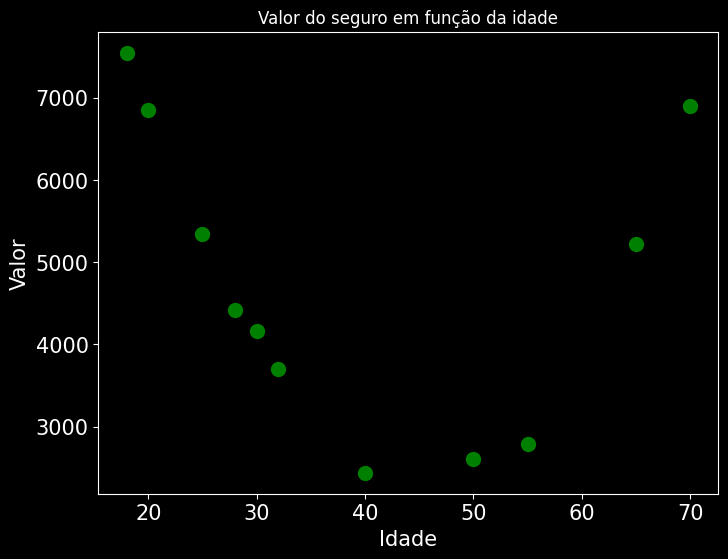

In [ ]:
plt.scatter(idades,valores, s=100,color = "green")
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade', fontdict={'size':12})

Text(0.5, 1.0, 'Valor do seguro em função da idade (Normalizados)')

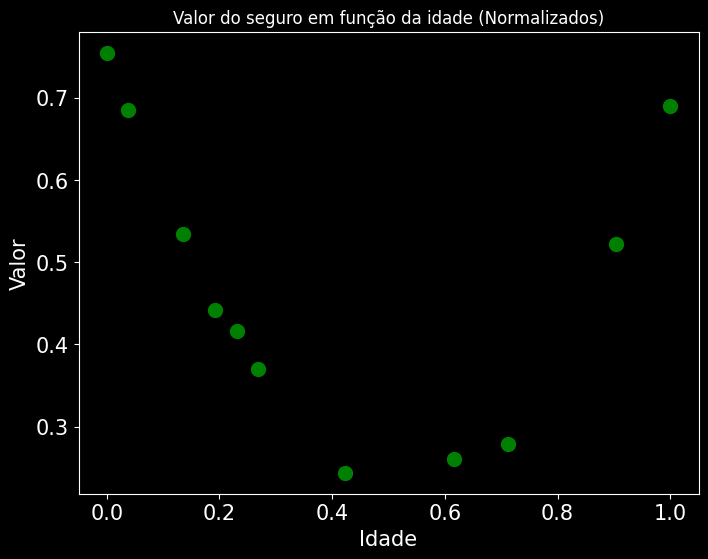

In [ ]:
plt.scatter(n_idades,n_valores, s=100,color = "green")
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade (Normalizados)', fontdict={'size':12})

In [ ]:
df = pd.DataFrame({'idade':n_idades, 'valor': n_valores})
df

,idade,valor
0,0.000000,0.754596
1,0.038462,0.684530
2,0.134615,0.533914
3,0.192308,0.442104
4,0.230769,0.416002
5,0.269231,0.369863
6,0.423077,0.244150
7,0.615385,0.261382
8,0.711538,0.278466
9,0.903846,0.522135


# Arquitetura do Modelo

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(2, input_shape=(1,)),
#     tf.keras.layers.Activation('sigmoid'),
#     tf.keras.layers.Dense(1)
# ])


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation="sigmoid", input_shape=(1,)),
    tf.keras.layers.Dense(1)
])


adam = tf.keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=adam, loss='mse')

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 2)                 4         
                                                                 
 dense_43 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Treinamento

In [ ]:
log = model.fit(n_idades, n_valores, epochs=400)
losses = log.history['loss']

Epoch 1/400
1/1 [==============================] - 1s 814ms/step - loss: 0.0346
Epoch 2/400
1/1 [==============================] - 0s 26ms/step - loss: 0.0544
Epoch 3/400
1/1 [==============================] - 0s 21ms/step - loss: 0.0336
Epoch 4/400
1/1 [==============================] - 0s 14ms/step - loss: 0.0307
Epoch 5/400
1/1 [==============================] - 0s 14ms/step - loss: 0.0404
Epoch 6/400
1/1 [==============================] - 0s 14ms/step - loss: 0.0369
Epoch 7/400
1/1 [==============================] - 0s 15ms/step - loss: 0.0295
Epoch 8/400
1/1 [==============================] - 0s 13ms/step - loss: 0.0294
Epoch 9/400
1/1 [==============================] - 0s 13ms/step - loss: 0.0340
Epoch 10/400
1/1 [==============================] - 0s 17ms/step - loss: 0.0347
Epoch 11/400
1/1 [==============================] - 0s 12ms/step - loss: 0.0311
Epoch 12/400
1/1 [==============================] - 0s 11ms/step - loss: 0.0284
Epoch 13/400
1/1 [==============================

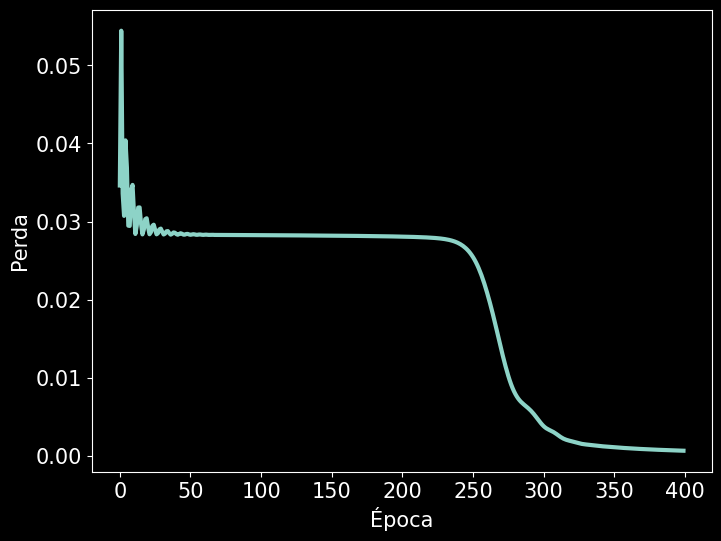

In [ ]:
plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

#Teste

In [ ]:
n_idades_teste = np.arange(0, 1.1, 0.1)

print(n_idades_teste)

n_valores_n1 = []
n_valores_n2 = []

weights, biases = model.layers[0].get_weights()

for i in n_idades_teste:
  n_valores_n1.append(i * weights[0][0] + biases[0])
  n_valores_n2.append(i * weights[0][1] + biases[1])

n_valores_n1 = np.array(n_valores_n1)
n_valores_n2 = np.array(n_valores_n2)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


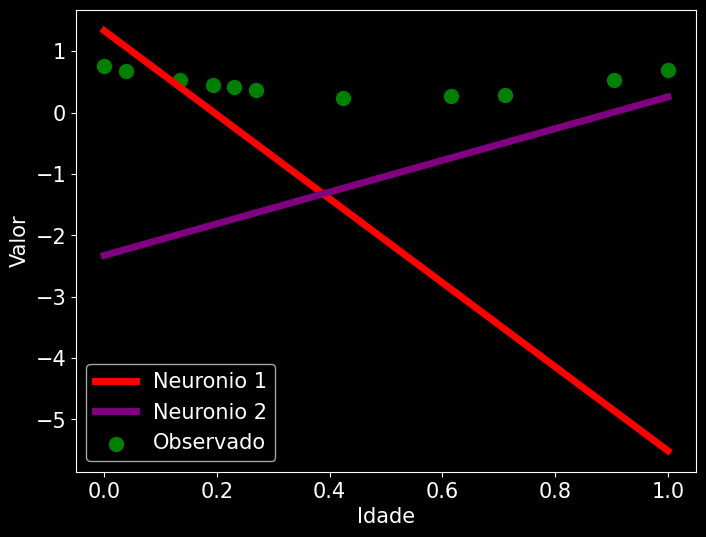

In [ ]:
plt.plot(n_idades_teste, n_valores_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_n2, color="purple", lw=5, label = 'Neuronio 2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [ ]:
n_valores_ativados_n1 = []
n_valores_ativados_n2 = []

for i in n_idades_teste:
  n_valores_l1 = model.layers[0](np.array([i])[:,None])
  #n_valores_l1 = np.array(tf.keras.backend.function([model.layers[0].input], [model.layers[1].output])(np.array([i])))

  n_valores_ativados_n1.append(n_valores_l1[0][0])
  n_valores_ativados_n2.append(n_valores_l1[0][1])

n_valores_teste = np.array(n_valores_teste)
n_valores_ativados_n1 = np.array(n_valores_ativados_n1)
n_valores_ativados_n2 = np.array(n_valores_ativados_n2)



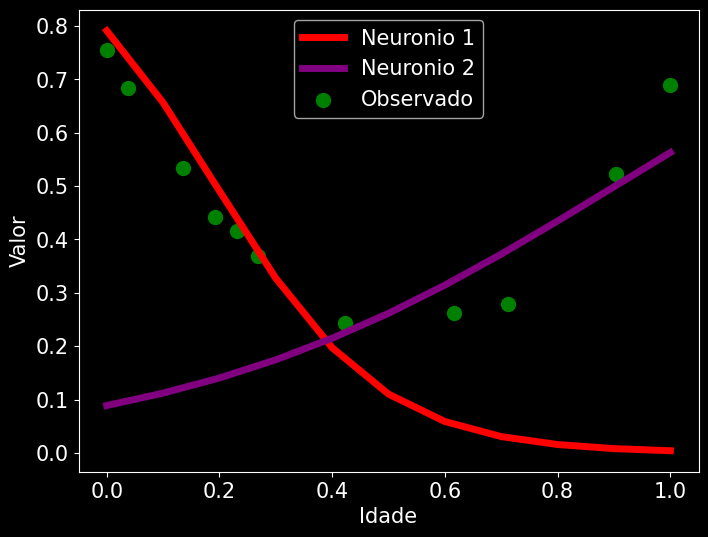

In [ ]:
plt.plot(n_idades_teste, n_valores_ativados_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_ativados_n2, color="purple", lw=5, label = 'Neuronio 2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

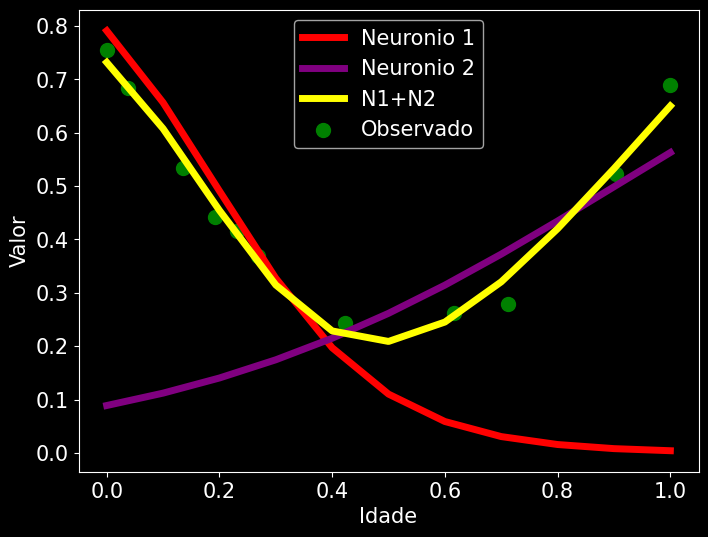

In [ ]:
weights, biases = model.layers[1].get_weights()
n1n2 = n_valores_ativados_n1 * weights[0] + n_valores_ativados_n2 * weights[1] + biases[0]

plt.plot(n_idades_teste, n_valores_ativados_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_ativados_n2, color="purple", lw=5, label = 'Neuronio 2')
plt.plot(n_idades_teste, n1n2, color="yellow", lw=5, label = 'N1+N2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [ ]:
n_valores_teste = []

n_valores_ativados_n1 = []
n_valores_ativados_n2 = []

for i in n_idades_teste:
  n_valores_teste.append(model.predict(np.array([i]))[0][0])

n_valores_teste = np.array(n_valores_teste)


1/1 [==============================] - 0s 20ms/step


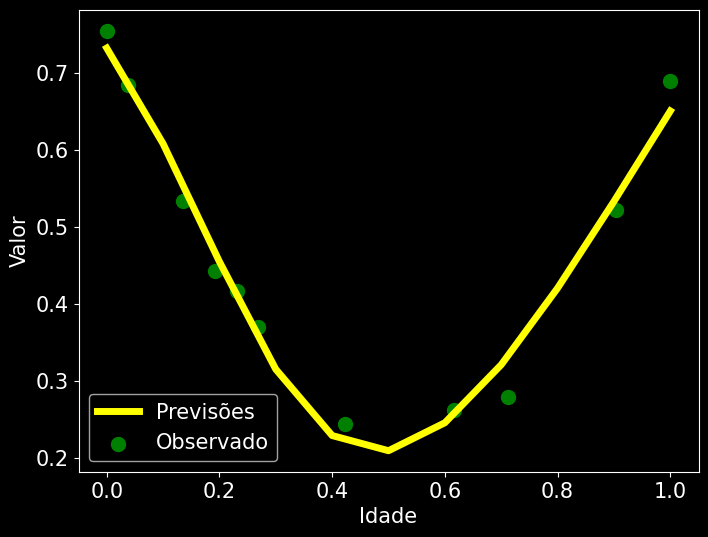

In [ ]:
plt.plot(n_idades_teste, n_valores_teste, color="yellow", lw=5, label = 'Previsões')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()